In [1110]:
import pandas as pd
import numpy as np
import math
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
import scipy

missing_values = ['?', 'NA', 'None', 'N/A']
df = pd.read_csv("auto-mpg.data", sep='\s+', na_values = missing_values)

In [1111]:
df.duplicated()
#df.mpg.duplicated()  #Duplicates in specific column
#df.drop_duplicates(keep='last')

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [1112]:
df.mpg.duplicated().sum()

271

In [1113]:
df.duplicated().sum()

2

In [1114]:
(~df.duplicated()).sum()

398

In [1115]:
df.loc[df.duplicated(), :]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
96,16.0,6,225.0,105.0,3439.0,15.5,71,1,plymouth satellite custom
158,13.0,8,351.0,158.0,4363.0,13.0,73,1,ford ltd


In [1116]:
df.loc[df.duplicated(keep='first'), :]  #keep one duplicated record and delete other record(s)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
96,16.0,6,225.0,105.0,3439.0,15.5,71,1,plymouth satellite custom
158,13.0,8,351.0,158.0,4363.0,13.0,73,1,ford ltd


In [1117]:
x_df = df.drop_duplicates()

In [1118]:
# x_df -> dataset does not have duplicates

In [1119]:
len(x_df)

398

In [1120]:
x_df.size

3582

In [1121]:
x_df.shape   # dimension of data frame after removing duplicates

(398, 9)

In [1076]:
x_df['horsepower'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Name: horsepower, Length: 398, dtype: bool

In [1077]:
x_df['horsepower'].isna().sum()

6

In [1078]:
x_df['horsepower'].isnull().sum()

6

In [1079]:
x_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [1080]:
x_df.shape

(398, 9)

In [1081]:
x_df_d = x_df.dropna()

In [1082]:
x_df_d.shape

(392, 9)

In [1009]:
from sklearn.model_selection import train_test_split

x = x_df_d.iloc[:, :]
y = x_df_d.iloc[:, ]

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.1)
x_train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
73,13.0,8,307.0,130.0,4098.0,14.0,72,1,chevrolet chevelle concours (sw)
148,24.0,4,90.0,75.0,2108.0,15.5,74,2,fiat 128
377,36.0,4,105.0,74.0,1980.0,15.3,82,2,volkswagen rabbit l
144,26.0,4,97.0,78.0,2300.0,14.5,74,2,opel manta
161,14.0,8,351.0,148.0,4657.0,13.5,75,1,ford ltd


In [1010]:
x_test.shape

(40, 9)

In [1011]:
x_test.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
79,26.0,4,96.0,69.0,2189.0,18.0,72,2,renault 12 (sw)
278,21.6,4,121.0,115.0,2795.0,15.7,78,2,saab 99gle
250,36.1,4,91.0,60.0,1800.0,16.4,78,3,honda civic cvcc
56,26.0,4,91.0,70.0,1955.0,20.5,71,1,plymouth cricket
395,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl


# part 2 (d)

In [976]:
x_actaul = x_test['horsepower']

In [977]:
x_test['x_actual'] = x_actual

In [1014]:
x_test['horsepower'] = None

In [979]:
x_predicted = []

In [982]:
x_predicted = x_test['horsepower'].fillna(x_train['horsepower'].mean())

In [983]:
x_test['x_predicted'] = x_predicted #imputed

In [1015]:
x_test['horsepower'] = x_test['horsepower'].fillna(x_train['horsepower'].mean())

In [925]:
# err = x_test['x_predicted'] - x_test['x_actual']
# x_test['err'] = err

In [926]:
# sq_err = x_test['err'] * x_test['err']
# x_test['sq_err'] = sq_err

In [1040]:
MSE = np.square(np.subtract(x_actual,x_predicted)).mean() 
RMSE = math.sqrt(MSE)
RMSE

39.0307007964458

# part 2 (e)

In [1053]:
x_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [1017]:
#df_weight = pd.DataFrame(x_test['weight'])

In [1125]:
x_new = x_df.drop('car_name', axis = 1)
x_new

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
395,27.0,4,140.0,86.0,2790.0,15.6,82,1
396,44.0,4,97.0,52.0,2130.0,24.6,82,2
397,32.0,4,135.0,84.0,2295.0,11.6,82,1
398,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [1018]:
# X = [x_test['weight']]

In [1127]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
norm_df = pd.DataFrame(scaler.fit_transform(x_new), columns = x_new.columns)
norm_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0


In [1130]:
# imputer = KNNImputer(n_neighbors=1)
# X_predicted = imputer.fit_transform(X)

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)
imputed_df = pd.DataFrame(imputer.fit_transform(norm_df),columns = norm_df.columns)
imputed_df.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
dtype: bool

In [1131]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
imputed_df = pd.DataFrame(imputer.fit_transform(norm_df),columns = norm_df.columns)
imputed_df.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
dtype: bool

In [1132]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputed_df = pd.DataFrame(imputer.fit_transform(norm_df),columns = norm_df.columns)
imputed_df.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
dtype: bool

In [1020]:
imputer = KNNImputer(n_neighbors=3)
X_predicted = imputer.fit_transform(X)

In [1021]:
imputer = KNNImputer(n_neighbors=5)
X_predicted = imputer.fit_transform(X)

In [1022]:
X_actual = [x_test['weight']]

In [1023]:
def calculate_rmse(rmse):
    np.square(np.subtract(X,X_predicted)).mean()
    

In [1024]:
MSE_weight = np.square(np.subtract(X,X_predicted)).mean() 
RMSE_weight = math.sqrt(MSE_weight)
RMSE_weight

0.0

In [1025]:
Y = [x_test['acceleration']]

In [1026]:
imputer = KNNImputer(n_neighbors=1)
Y_predicted = imputer.fit_transform(Y)

In [1027]:
imputer = KNNImputer(n_neighbors=3)
Y_predicted = imputer.fit_transform(Y)

In [1028]:
imputer = KNNImputer(n_neighbors=5)
Y_predicted = imputer.fit_transform(Y)

In [1029]:
MSE_acc = np.square(np.subtract(Y,Y_predicted)).mean() 
RMSE_acc = math.sqrt(MSE_acc)
RMSE_acc

0.0

In [1030]:
Z = [x_test['displacement']]

In [1031]:
imputer = KNNImputer(n_neighbors=1)
Z_predicted = imputer.fit_transform(Z)

In [1032]:
imputer = KNNImputer(n_neighbors=3)
Z_predicted = imputer.fit_transform(Z)

In [1033]:
imputer = KNNImputer(n_neighbors=5)
Z_predicted = imputer.fit_transform(Z)

In [1034]:
MSE_disp = np.square(np.subtract(Z,Z_predicted)).mean() 
RMSE_disp = math.sqrt(MSE_disp)
RMSE_disp

0.0

In [1035]:
W = [x_test['mpg']]

In [1036]:
imputer = KNNImputer(n_neighbors=1)
W_predicted = imputer.fit_transform(W)

In [1037]:
imputer = KNNImputer(n_neighbors=3)
W_predicted = imputer.fit_transform(W)

In [1038]:
imputer = KNNImputer(n_neighbors=5)
W_predicted = imputer.fit_transform(W)

In [1039]:
MSE_mpg = np.square(np.subtract(W,W_predicted)).mean() 
RMSE_mpg = math.sqrt(MSE_disp)
RMSE_mpg

0.0

# part 2 (f)

In [1090]:
x_df['horsepower'].fillna(x_df['horsepower'].mean())
#x_df

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
395     86.0
396     52.0
397     84.0
398     79.0
399     82.0
Name: horsepower, Length: 398, dtype: float64

# part 3 (a)

In [1054]:
#skewness
from scipy.stats import skew 
skew(x_df['mpg'], axis=0, bias=True)   #the distribution is positively skewed

0.45534192556309266

In [1055]:
#kurtosis
from scipy.stats import kurtosis
kurtosis(x_df['mpg'], axis=0, bias=True)     #the distribution has more values in the tails compared to a normal distribution.

-0.5194245405990445

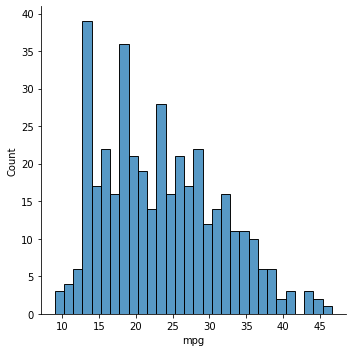

In [1056]:
# Draw the histogram using the seaborn distplot function
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(x_df['mpg'],bins=30,kde=False)
plt.show()

# part 3 (b)

In [1052]:
#Identify outliers of mpg using Inter Quartile Range (IQR) approach and impute them with min and max values appropriately. 

In [1091]:
x_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
395,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
396,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
397,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
398,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [1093]:
#importing packages
import matplotlib.pyplot as plt
%matplotlib inline

In [1095]:
#lower and upperbound function
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

lowerbound,upperbound = outlier_treatment(x_df['mpg'])

In [1097]:
lowerbound

0.25

In [1098]:
upperbound

46.25

In [1096]:
x_df[(x_df['mpg'] < lowerbound) | (x_df['mpg'] > upperbound)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
324,46.6,4,86.0,65.0,2110.0,17.9,80,3,mazda glc


In [1099]:
# boxplot
# histogram
# scattered plot

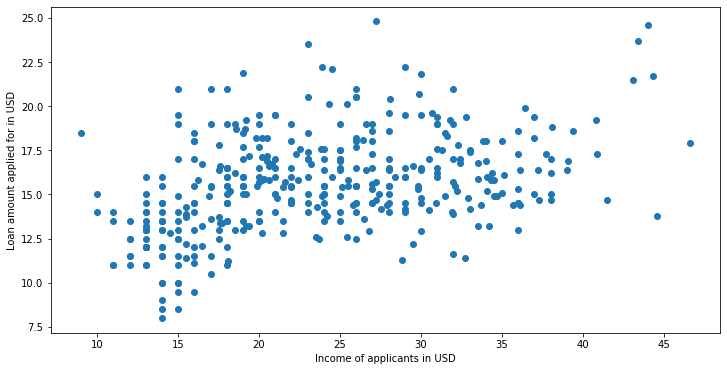

In [1101]:
# fig, ax = plt.subplots(figsize=(12,6))
# ax.scatter(x_df['mpg'], x_df['acceleration'])
# ax.set_xlabel('Income of applicants in USD')
# ax.set_ylabel('Loan amount applied for in USD')
# plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mpg'>

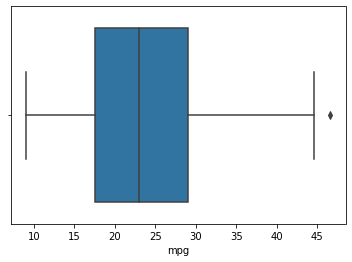

In [1108]:
sns.boxplot(x_df['mpg'])

<AxesSubplot:>

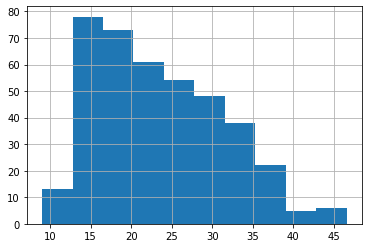

In [1109]:
x_df['mpg'].hist()